### Imports

In [49]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [50]:
pd.set_option('display.max_columns', None)

### Loading Data and Preprocessing

In [51]:
df = pd.read_csv('data.csv')
df.head()

/var/folders/ct/krzz24hj5m3dtk4zh4l2xwd00000gn/T/ipykernel_72652/3021068287.py:1: DtypeWarning: Columns (1,2,3,7,8,9,11,12,13,14,17,18,19) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('data.csv')


,item_id,status,created_at,sku,price,qty_ordered,grand_total,increment_id,category_name_1,sales_commission_code,discount_amount,payment_method,Working Date,BI Status,MV,Year,Month,Customer Since,M-Y,FY,Customer ID,Unnamed: 21,Unnamed: 22,Unnamed: 23,Unnamed: 24,Unnamed: 25
0,211131.0,complete,7/1/2016,kreations_YI 06-L,1950.0,1.0,1950.0,100147443,Women's Fashion,\N,0.0,cod,7/1/2016,#REF!,"1,950",2016.0,7.0,2016-7,7-2016,FY17,1.0,NaN,NaN,NaN,NaN,NaN
1,211133.0,canceled,7/1/2016,kcc_Buy 2 Frey Air Freshener & Get 1 Kasual Bo...,240.0,1.0,240.0,100147444,Beauty & Grooming,\N,0.0,cod,7/1/2016,Gross,240,2016.0,7.0,2016-7,7-2016,FY17,2.0,NaN,NaN,NaN,NaN,NaN
2,211134.0,canceled,7/1/2016,Ego_UP0017-999-MR0,2450.0,1.0,2450.0,100147445,Women's Fashion,\N,0.0,cod,7/1/2016,Gross,"2,450",2016.0,7.0,2016-7,7-2016,FY17,3.0,NaN,NaN,NaN,NaN,NaN
3,211135.0,complete,7/1/2016,kcc_krone deal,360.0,1.0,60.0,100147446,Beauty & Grooming,R-FSD-52352,300.0,cod,7/1/2016,Net,360,2016.0,7.0,2016-7,7-2016,FY17,4.0,NaN,NaN,NaN,NaN,NaN
4,211136.0,order_refunded,7/1/2016,BK7010400AG,555.0,2.0,1110.0,100147447,Soghaat,\N,0.0,cod,7/1/2016,Valid,"1,110",2016.0,7.0,2016-7,7-2016,FY17,5.0,NaN,NaN,NaN,NaN,NaN


#### Data Overview

In [52]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 26 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   item_id                584524 non-null  float64
 1   status                 584509 non-null  object 
 2   created_at             584524 non-null  object 
 3   sku                    584504 non-null  object 
 4   price                  584524 non-null  float64
 5   qty_ordered            584524 non-null  float64
 6   grand_total            584524 non-null  float64
 7   increment_id           584524 non-null  object 
 8   category_name_1        584360 non-null  object 
 9   sales_commission_code  447349 non-null  object 
 10  discount_amount        584524 non-null  float64
 11  payment_method         584524 non-null  object 
 12  Working Date           584524 non-null  object 
 13  BI Status              584524 non-null  object 
 14   MV                    584524 non-

In [53]:
df.describe()

,item_id,price,qty_ordered,grand_total,discount_amount,Year,Month,Customer ID,Unnamed: 21,Unnamed: 22,Unnamed: 23,Unnamed: 24,Unnamed: 25
count,584524.000000,5.845240e+05,584524.000000,5.845240e+05,584524.000000,584524.000000,584524.000000,584513.000000,0.0,0.0,0.0,0.0,0.0
mean,565667.074218,6.348748e+03,1.296388,8.530619e+03,499.492775,2017.044115,7.167654,45790.511965,NaN,NaN,NaN,NaN,NaN
std,200121.173648,1.494927e+04,3.996061,6.132081e+04,1506.943046,0.707355,3.486305,34414.962389,NaN,NaN,NaN,NaN,NaN
min,211131.000000,0.000000e+00,1.000000,-1.594000e+03,-599.500000,2016.000000,1.000000,1.000000,NaN,NaN,NaN,NaN,NaN
25%,395000.750000,3.600000e+02,1.000000,9.450000e+02,0.000000,2017.000000,4.000000,13516.000000,NaN,NaN,NaN,NaN,NaN
50%,568424.500000,8.990000e+02,1.000000,1.960400e+03,0.000000,2017.000000,7.000000,42856.000000,NaN,NaN,NaN,NaN,NaN
75%,739106.250000,4.070000e+03,1.000000,6.999000e+03,160.500000,2018.000000,11.000000,73536.000000,NaN,NaN,NaN,NaN,NaN
max,905208.000000,1.012626e+06,1000.000000,1.788800e+07,90300.000000,2018.000000,12.000000,115326.000000,NaN,NaN,NaN,NaN,NaN


#### Remove unwanted columns

In [54]:
# Remove unwanted columns
df.drop(columns=['Unnamed: 21', 'Unnamed: 22', 'Unnamed: 23', 'Unnamed: 24', 'Unnamed: 25'], inplace=True)

df.head()

,item_id,status,created_at,sku,price,qty_ordered,grand_total,increment_id,category_name_1,sales_commission_code,discount_amount,payment_method,Working Date,BI Status,MV,Year,Month,Customer Since,M-Y,FY,Customer ID
0,211131.0,complete,7/1/2016,kreations_YI 06-L,1950.0,1.0,1950.0,100147443,Women's Fashion,\N,0.0,cod,7/1/2016,#REF!,"1,950",2016.0,7.0,2016-7,7-2016,FY17,1.0
1,211133.0,canceled,7/1/2016,kcc_Buy 2 Frey Air Freshener & Get 1 Kasual Bo...,240.0,1.0,240.0,100147444,Beauty & Grooming,\N,0.0,cod,7/1/2016,Gross,240,2016.0,7.0,2016-7,7-2016,FY17,2.0
2,211134.0,canceled,7/1/2016,Ego_UP0017-999-MR0,2450.0,1.0,2450.0,100147445,Women's Fashion,\N,0.0,cod,7/1/2016,Gross,"2,450",2016.0,7.0,2016-7,7-2016,FY17,3.0
3,211135.0,complete,7/1/2016,kcc_krone deal,360.0,1.0,60.0,100147446,Beauty & Grooming,R-FSD-52352,300.0,cod,7/1/2016,Net,360,2016.0,7.0,2016-7,7-2016,FY17,4.0
4,211136.0,order_refunded,7/1/2016,BK7010400AG,555.0,2.0,1110.0,100147447,Soghaat,\N,0.0,cod,7/1/2016,Valid,"1,110",2016.0,7.0,2016-7,7-2016,FY17,5.0


In [55]:
df.dropna(how='all', inplace=True)
df.tail()

,item_id,status,created_at,sku,price,qty_ordered,grand_total,increment_id,category_name_1,sales_commission_code,discount_amount,payment_method,Working Date,BI Status,MV,Year,Month,Customer Since,M-Y,FY,Customer ID
584519,905204.0,cod,8/28/2018,WOFSCE5AE00357AECDE,699.0,1.0,849.0,100562385,Women's Fashion,NaN,0.0,cod,8/28/2018,Valid,699,2018.0,8.0,2018-8,8-2018,FY19,115320.0
584520,905205.0,processing,8/28/2018,MATHUA5AF70A7D1E50A,35599.0,1.0,35899.0,100562386,Mobiles & Tablets,NaN,0.0,bankalfalah,8/28/2018,Gross,"35,599",2018.0,8.0,2018-8,8-2018,FY19,115326.0
584521,905206.0,processing,8/28/2018,MATSAM5B6D7208C6D30,129999.0,2.0,652178.0,100562387,Mobiles & Tablets,NaN,0.0,bankalfalah,8/28/2018,Gross,"259,998",2018.0,8.0,2018-7,8-2018,FY19,113474.0
584522,905207.0,processing,8/28/2018,MATSAM5B1509B4696EA,87300.0,2.0,652178.0,100562387,Mobiles & Tablets,NaN,0.0,bankalfalah,8/28/2018,Gross,"174,600",2018.0,8.0,2018-7,8-2018,FY19,113474.0
584523,905208.0,processing,8/28/2018,MATSAM5B10F91A9B6AB,108640.0,2.0,652178.0,100562387,Mobiles & Tablets,NaN,0.0,bankalfalah,8/28/2018,Gross,"217,280",2018.0,8.0,2018-7,8-2018,FY19,113474.0


In [56]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 584524 entries, 0 to 584523
Data columns (total 21 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   item_id                584524 non-null  float64
 1   status                 584509 non-null  object 
 2   created_at             584524 non-null  object 
 3   sku                    584504 non-null  object 
 4   price                  584524 non-null  float64
 5   qty_ordered            584524 non-null  float64
 6   grand_total            584524 non-null  float64
 7   increment_id           584524 non-null  object 
 8   category_name_1        584360 non-null  object 
 9   sales_commission_code  447349 non-null  object 
 10  discount_amount        584524 non-null  float64
 11  payment_method         584524 non-null  object 
 12  Working Date           584524 non-null  object 
 13  BI Status              584524 non-null  object 
 14   MV                    584524 non-nu

#### Rename Columns

In [57]:
df.rename(columns={
  "category_name_1": 'category',
  ' MV ': 'MV'
}, inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 584524 entries, 0 to 584523
Data columns (total 21 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   item_id                584524 non-null  float64
 1   status                 584509 non-null  object 
 2   created_at             584524 non-null  object 
 3   sku                    584504 non-null  object 
 4   price                  584524 non-null  float64
 5   qty_ordered            584524 non-null  float64
 6   grand_total            584524 non-null  float64
 7   increment_id           584524 non-null  object 
 8   category               584360 non-null  object 
 9   sales_commission_code  447349 non-null  object 
 10  discount_amount        584524 non-null  float64
 11  payment_method         584524 non-null  object 
 12  Working Date           584524 non-null  object 
 13  BI Status              584524 non-null  object 
 14  MV                     584524 non-nu

In [58]:
df['category']

0           Women's Fashion
1         Beauty & Grooming
2           Women's Fashion
3         Beauty & Grooming
4                   Soghaat
                ...        
584519      Women's Fashion
584520    Mobiles & Tablets
584521    Mobiles & Tablets
584522    Mobiles & Tablets
584523    Mobiles & Tablets
Name: category, Length: 584524, dtype: object

#### Changing Data Types

In [59]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 584524 entries, 0 to 584523
Data columns (total 21 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   item_id                584524 non-null  float64
 1   status                 584509 non-null  object 
 2   created_at             584524 non-null  object 
 3   sku                    584504 non-null  object 
 4   price                  584524 non-null  float64
 5   qty_ordered            584524 non-null  float64
 6   grand_total            584524 non-null  float64
 7   increment_id           584524 non-null  object 
 8   category               584360 non-null  object 
 9   sales_commission_code  447349 non-null  object 
 10  discount_amount        584524 non-null  float64
 11  payment_method         584524 non-null  object 
 12  Working Date           584524 non-null  object 
 13  BI Status              584524 non-null  object 
 14  MV                     584524 non-nu

In [60]:
# Change the data type of Quantity Orders
df['qty_ordered'] = df['qty_ordered'].astype('int')

# Change Working Date data type to Pandas Date Time
df['Working Date'] = pd.to_datetime(df['Working Date'])

df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 584524 entries, 0 to 584523
Data columns (total 21 columns):
 #   Column                 Non-Null Count   Dtype         
---  ------                 --------------   -----         
 0   item_id                584524 non-null  float64       
 1   status                 584509 non-null  object        
 2   created_at             584524 non-null  object        
 3   sku                    584504 non-null  object        
 4   price                  584524 non-null  float64       
 5   qty_ordered            584524 non-null  int64         
 6   grand_total            584524 non-null  float64       
 7   increment_id           584524 non-null  object        
 8   category               584360 non-null  object        
 9   sales_commission_code  447349 non-null  object        
 10  discount_amount        584524 non-null  float64       
 11  payment_method         584524 non-null  object        
 12  Working Date           584524 non-null  date

#### Remove orders that have values in Negative

In [61]:
df.describe()

,item_id,price,qty_ordered,grand_total,discount_amount,Year,Month,Customer ID
count,584524.000000,5.845240e+05,584524.000000,5.845240e+05,584524.000000,584524.000000,584524.000000,584513.000000
mean,565667.074218,6.348748e+03,1.296388,8.530619e+03,499.492775,2017.044115,7.167654,45790.511965
std,200121.173648,1.494927e+04,3.996061,6.132081e+04,1506.943046,0.707355,3.486305,34414.962389
min,211131.000000,0.000000e+00,1.000000,-1.594000e+03,-599.500000,2016.000000,1.000000,1.000000
25%,395000.750000,3.600000e+02,1.000000,9.450000e+02,0.000000,2017.000000,4.000000,13516.000000
50%,568424.500000,8.990000e+02,1.000000,1.960400e+03,0.000000,2017.000000,7.000000,42856.000000
75%,739106.250000,4.070000e+03,1.000000,6.999000e+03,160.500000,2018.000000,11.000000,73536.000000
max,905208.000000,1.012626e+06,1000.000000,1.788800e+07,90300.000000,2018.000000,12.000000,115326.000000


In [62]:
df = df[df['grand_total'] >= 0]

In [63]:
df.describe()

,item_id,price,qty_ordered,grand_total,discount_amount,Year,Month,Customer ID
count,584448.000000,5.844480e+05,584448.000000,5.844480e+05,584448.000000,584448.000000,584448.000000,584437.000000
mean,565650.463302,6.349183e+03,1.296401,8.531766e+03,499.472812,2017.044062,7.167676,45792.213830
std,200123.146725,1.494994e+04,3.996316,6.132472e+04,1507.013435,0.707363,3.486323,34415.398983
min,211131.000000,0.000000e+00,1.000000,0.000000e+00,-599.500000,2016.000000,1.000000,1.000000
25%,394975.750000,3.600000e+02,1.000000,9.452000e+02,0.000000,2017.000000,4.000000,13516.000000
50%,568388.000000,8.990000e+02,1.000000,1.961320e+03,0.000000,2017.000000,7.000000,42856.000000
75%,739099.250000,4.070000e+03,1.000000,6.999000e+03,160.182975,2018.000000,11.000000,73540.000000
max,905208.000000,1.012626e+06,1000.000000,1.788800e+07,90300.000000,2018.000000,12.000000,115326.000000


In [64]:
df = df[df['discount_amount'] >= 0]
df.describe()

,item_id,price,qty_ordered,grand_total,discount_amount,Year,Month,Customer ID
count,584445.000000,5.844450e+05,584445.000000,5.844450e+05,584445.000000,584445.000000,584445.000000,584434.000000
mean,565651.294474,6.349204e+03,1.296394,8.531792e+03,499.476409,2017.044062,7.167703,45792.446204
std,200123.324086,1.494997e+04,3.996323,6.132487e+04,1507.016332,0.707365,3.486312,34415.334452
min,211131.000000,0.000000e+00,1.000000,0.000000e+00,0.000000,2016.000000,1.000000,1.000000
25%,394975.000000,3.600000e+02,1.000000,9.452000e+02,0.000000,2017.000000,4.000000,13516.000000
50%,568391.000000,8.990000e+02,1.000000,1.961320e+03,0.000000,2017.000000,7.000000,42856.000000
75%,739100.000000,4.070000e+03,1.000000,6.999000e+03,160.191900,2018.000000,11.000000,73540.000000
max,905208.000000,1.012626e+06,1000.000000,1.788800e+07,90300.000000,2018.000000,12.000000,115326.000000


### Question: 1
#### What is the best selling category?

In [75]:
best_selling_category = df.groupby(['category', 'Year'])['item_id'].agg(['count']).reset_index().sort_values(by='count', ascending=False)
best_selling_category

,category,Year,count
28,Mobiles & Tablets,2017.0,59715
25,Men's Fashion,2017.0,49498
43,Women's Fashion,2017.0,35202
29,Mobiles & Tablets,2018.0,33697
1,Appliances,2017.0,27131
40,Superstore,2017.0,26999
24,Men's Fashion,2016.0,25408
32,Others,2018.0,24014
27,Mobiles & Tablets,2016.0,22289
4,Beauty & Grooming,2017.0,18438


<AxesSubplot:xlabel='category', ylabel='count'>

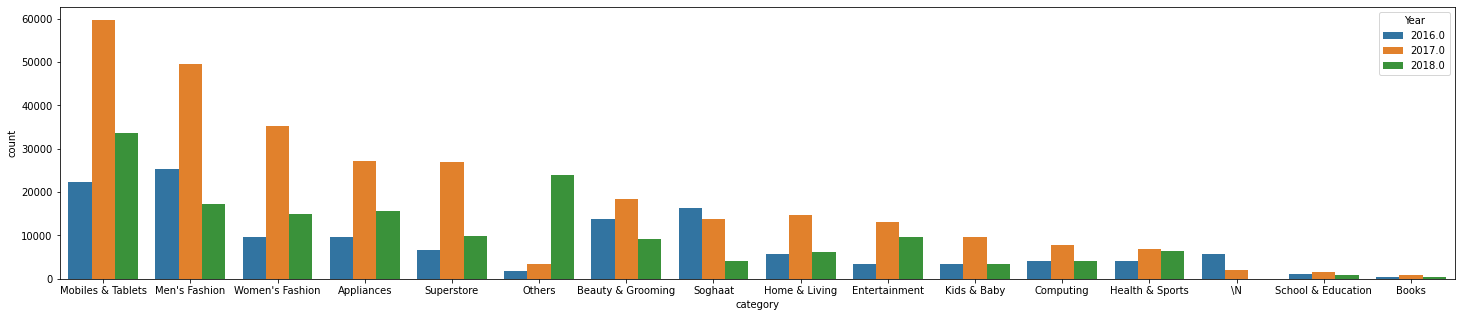

In [76]:
plt.figure(figsize=(25, 5))
sns.barplot(x='category', y='count', data=best_selling_category, hue='Year')

### Question: 2
#### How many orders are completed, Cancelled, refunded?

In [81]:
order_status = df.groupby(['status', 'Year'])['item_id'].agg(['count']).reset_index().sort_values(by='count', ascending=False)

<AxesSubplot:xlabel='status', ylabel='count'>

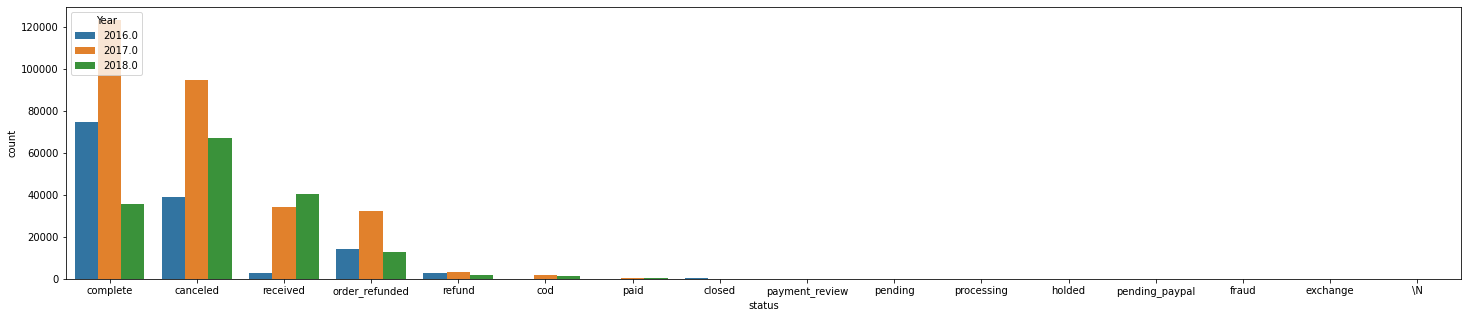

In [83]:
plt.figure(figsize=(25, 5))
sns.barplot(x='status', y='count', data=order_status, hue='Year')

### Question: 3
#### Which payment method was used most often?

In [85]:
payment_method = df.groupby(['payment_method', 'Year'])['item_id'].agg(['count']).reset_index().sort_values(by='count', ascending=False)
payment_method

,payment_method,Year,count
13,cod,2017.0,139987
12,cod,2016.0,76741
14,cod,2018.0,55232
0,Easypay,2017.0,52631
5,Payaxis,2017.0,48919
1,Easypay,2018.0,30230
4,Payaxis,2016.0,27068
9,bankalfalah,2018.0,23043
18,easypay_voucher,2017.0,22679
6,Payaxis,2018.0,21630


<AxesSubplot:xlabel='payment_method', ylabel='count'>

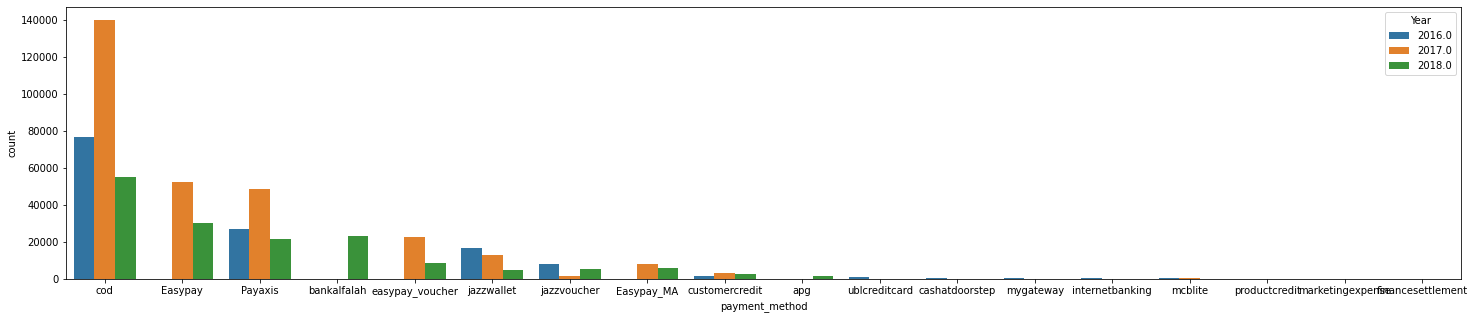

In [87]:
plt.figure(figsize=(25, 5))
sns.barplot(x='payment_method', y='count', data=payment_method, hue='Year')

### Question: 4
#### Which category has most cancelled orders?

In [92]:
order_status_category = df.groupby(['status', 'category', 'Year'])['item_id'].agg(['count']).reset_index().sort_values(by='count', ascending=False)
order_status_category

,status,category,Year,count
29,canceled,Mobiles & Tablets,2017.0,26059
144,complete,Mobiles & Tablets,2017.0,24166
141,complete,Men's Fashion,2017.0,20174
30,canceled,Mobiles & Tablets,2018.0,17941
33,canceled,Others,2018.0,15977
...,...,...,...,...
281,processing,Beauty & Grooming,2018.0,1
67,closed,Kids & Baby,2017.0,1
163,exchange,Computing,2016.0,1
282,processing,Health & Sports,2018.0,1


<AxesSubplot:xlabel='category', ylabel='count'>

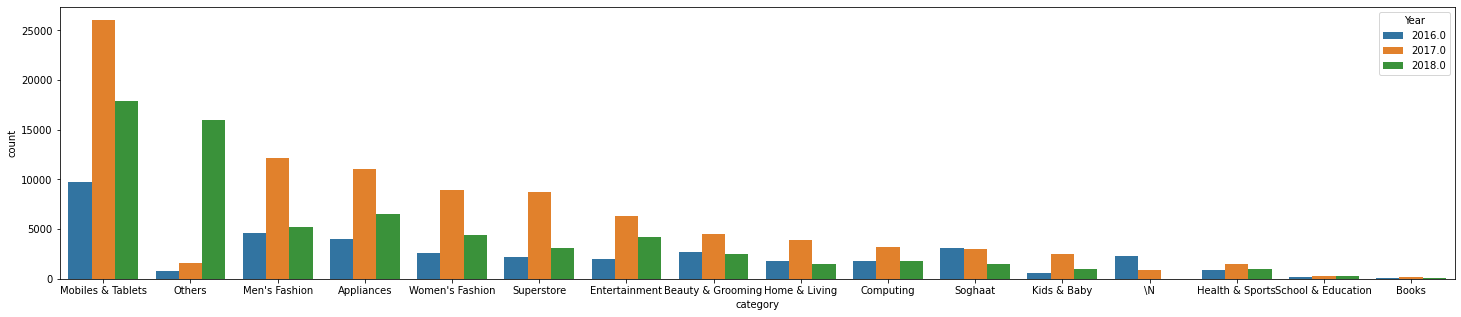

In [94]:
mask = order_status_category[order_status_category['status'] == 'canceled']
plt.figure(figsize=(25, 5))
sns.barplot(x='category', y='count', data=mask, hue='Year')

### Question: 5
#### Which Category has most amount of sales?

In [106]:
category_amount = df.groupby(['category', 'Year'])['grand_total'].agg(['sum']).reset_index().sort_values(by='sum', ascending=False)
category_amount

NameError: name 'customer_Year' is not defined

<AxesSubplot:xlabel='category', ylabel='sum'>

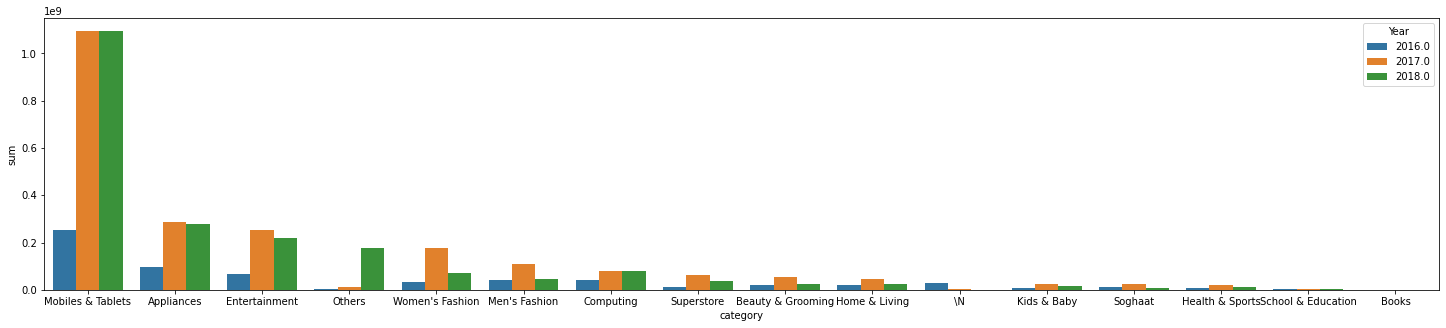

In [105]:
mask = order_status_category[order_status_category['status'] == 'complete']
plt.figure(figsize=(25, 5))
sns.barplot(x='category', y='sum', data=category_amount, hue='Year')

### Question: 6
#### #### Top customers who cancelled most orders

In [108]:
customer_Year = df.groupby(['Customer ID', 'status', 'Year'])['item_id'].agg(['count']).reset_index().sort_values(by='count', ascending=False)
customer_Year

,Customer ID,status,Year,count
617,163.0,complete,2016.0,1430
133,35.0,complete,2016.0,1393
144455,85775.0,received,2018.0,1264
167,43.0,complete,2016.0,880
144453,85775.0,complete,2018.0,863
...,...,...,...,...
79816,44008.0,complete,2017.0,1
79815,44007.0,canceled,2017.0,1
79814,44006.0,order_refunded,2017.0,1
79813,44005.0,complete,2017.0,1


<AxesSubplot:xlabel='Customer ID', ylabel='count'>

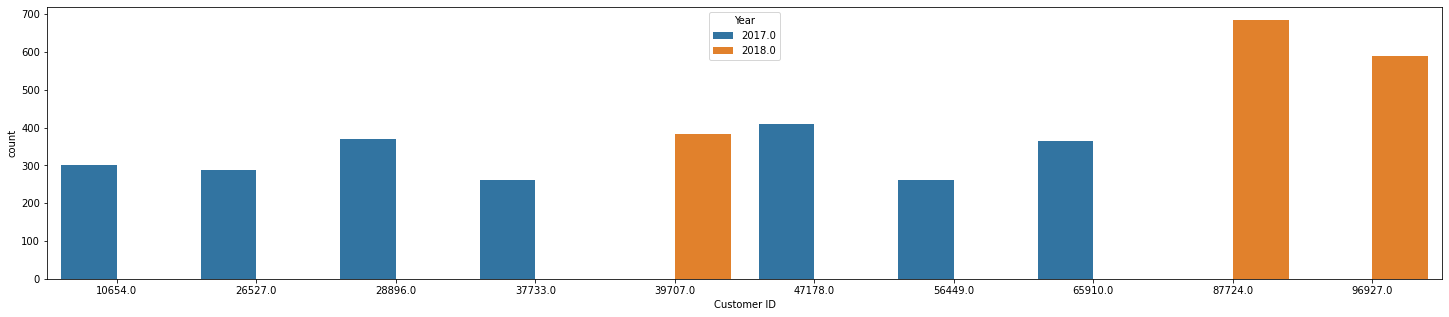

In [109]:
mask = customer_Year[customer_Year['status'] == 'canceled']
plt.figure(figsize=(25, 5))
sns.barplot(x='Customer ID', y='count', data=mask.head(10), hue='Year')